#### Section 1. Business Understanding

For this project on writing a data science blog post, I have chosen a dataset on Sleep Apnea from VA Medical Center - Detroit. This dataset has Sleep apnea Architecture and metrics along with other info about the patients. To help better understand the data I have the following questions. 

Questions
 
* What role does Race play over the Preventable factors and their impacts over Sleep Apnea?
* What affect does Race have in the non-Preventable factors and their impacts over Sleep Apnea?
* Can Sleep Apnea be cured or for that matter even controlled/managed over time? If yes, how?
* How are these factors influencing the severity of the disease and its treatment?


In [1]:
# Import libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Section 2: Data understanding

##### Access Data

Data is read using the Pandas read_csv() function and stored in df 

In [2]:
df=pd.read_csv("Sleep_Apnea_Data.csv")
df.head(4) # preview dataframe

,Participant Coded,Age(Yrs),Race,Socio-Economic Status,Presence of OSA associated gene-Serotonin receptor encoding gene (HTR2A),BMI,Obesity,Education,Type of Meals,Diabetic,...,Hypertension,Lowest Oxygen Desaturation(%) -hypoxic burden/stress,Average Apnea Duration(seconds)- sleep apnea architecture,Arousal Index(Number of Arousals/Hour)- sleep fragmentation,% NREM Sleep-Sleep Quality,Average CPAP use(hours/night) -CPAP compliance/adherance,Apnea Hypopnea Index AHI-After 12 weeks of CPAP Use,Reduction in Snoring-After 12 weeks of CPAP Use,Reduction in Tiredness-After 12 weeks of CPAP Use,Reduction in Daytime Sleepiness-After 12 weeks of CPAP Use
0,AB,44,AA,Middle,Y,29.8,N,UG,P,N,...,Y,81.3,25.4,27.40,0.95,5.42,38.0,1,1,1
1,AF,57,Cauc,Middle,N,27.8,N,UG,P,N,...,N,90.9,14.4,14.77,0.97,5.85,12.9,4,4,3
2,AK,34,Cauc,Middle,N,28.8,N,UG,P,N,...,N,88.8,16.1,14.77,0.95,6.32,20.3,4,4,4
3,AL,49,AA,Middle,Y,37.8,Y,UG,F,N,...,Y,81.2,29.2,28.08,0.91,4.30,68.3,1,1,1


##### Explore Data

In [3]:
# Let's look at number of columns, column labels, column data types, memory usage, range index, 
# and the number of cells in each column (non-null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 25 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Participant Coded                                                         208 non-null    object 
 1   Age(Yrs)                                                                  208 non-null    int64  
 2   Race                                                                      208 non-null    object 
 3   Socio-Economic Status                                                     208 non-null    object 
 4   Presence of OSA associated gene-Serotonin receptor encoding gene (HTR2A)  208 non-null    object 
 5   BMI                                                                       208 non-null    float64
 6   Obesity                                                           

> A look at the dataframe's schema gives us this info: 
* The dataframe consists of 208 observations and 25 columns.
* The only column that has some Null values is Physical Health Index, which has 208-201=7 records/observations with Null values.
* The column name for % NREM Sleep- Sleep Quality does not seem to be consistent with other column names in the dataframe
* The column names for Column number 4 and columns 16-24 could be revisited to be renamed for better use.
* The file can be optimized for memory by converting columns to more approporiate data types and removing columns that may not provide any value to analysis. 

In [4]:
# Display a sample of the dataframe
df.sample(3)

,Participant Coded,Age(Yrs),Race,Socio-Economic Status,Presence of OSA associated gene-Serotonin receptor encoding gene (HTR2A),BMI,Obesity,Education,Type of Meals,Diabetic,...,Hypertension,Lowest Oxygen Desaturation(%) -hypoxic burden/stress,Average Apnea Duration(seconds)- sleep apnea architecture,Arousal Index(Number of Arousals/Hour)- sleep fragmentation,% NREM Sleep-Sleep Quality,Average CPAP use(hours/night) -CPAP compliance/adherance,Apnea Hypopnea Index AHI-After 12 weeks of CPAP Use,Reduction in Snoring-After 12 weeks of CPAP Use,Reduction in Tiredness-After 12 weeks of CPAP Use,Reduction in Daytime Sleepiness-After 12 weeks of CPAP Use
177,XT2,20,Cauc,Low,N,23.0,N,HS,P,N,...,N,92.4,18.3,10.54,0.92,5.72,13.3,5,3,5
89,MT,32,Cauc,Middle,N,26.4,N,UG,P,N,...,N,90.5,14.7,12.07,0.87,6.50,21.6,5,4,4
30,GA,32,Cauc,Middle,N,39.0,Y,HS,F,N,...,N,87.3,13.3,13.55,0.91,4.51,9.1,5,3,5


> There is Participant Coded,Age,Race,Socio-Economic Status,Presence of HTR2A gene,BMI,Obesity,Education,Type of Meals,Diabetic,Smoking,Exercise Duration,Lifestyle,Physical health Index,Apnea Hypopnea Index,Hypertension,Lowest Oxygen Desaturation,Average Apnea Duration,Arousal Index,Sleep Quality,Average CPAP Use,AHI-Post 12weeks CPAP Use,Reduction in Snoring-Post 12weeks CPAP Use,Reduction in Tiredness-Post 12weeks CPAP Use,Reduction in Daytime Sleepiness-Post 12weeks CPAP Use. All together there are 24 distinct metrics/measures for evaluating the patient.

In [5]:
# Display the values in the Race column to take a close look at the values for classification
df["Race"].head(10)

0      AA
1    Cauc
2    Cauc
3      AA
4      AA
5      AA
6      AA
7    Cauc
8    Cauc
9      AA
Name: Race, dtype: object

> The Race column appears to have values of only two types AA- African American and CAUC - Caucasion. Lets confirm this further

In [6]:
# Lets check for any duplicates in few of the Object type columns in our DF as listed earlier
df.duplicated(subset=["Race","Obesity","Diabetic","Smoking"],keep = False).sum()

208

> It says 208 duplicates?? This doesnt make much sense. Lets rather check for the distinct values in these columns.

In [7]:
# count the number of values in the category column
df["Race"].value_counts()

AA      104
Cauc    104
Name: Race, dtype: int64

In [8]:
df["Obesity"].value_counts()

Y    120
N     88
Name: Obesity, dtype: int64

In [9]:
df["Diabetic"].value_counts()

N    208
Name: Diabetic, dtype: int64

In [10]:
df["Type of Meals"].value_counts()

P    122
F     86
Name: Type of Meals, dtype: int64

> Race and Obesity columns each have 2 types of values in them, of which Race could be used as a major classification criteria.

So taking a closer look at the observations we can deduce that
* The entire dataset is of participants who are Non-Smokers and also they dont have any type of Diabetes.
* The columns Participant Coded, Diabetic and Smoking can be dropped without any loss of details; they do not provide any contrast value for analysis. 
* The Race column has though only two distinct values , but it has equal distribution of entire dataset into AA and CAUC.
* The columns like Obesity, Presence of OSA Gene, Hypertension could be rather converted to Bool type, since they hold only Y/N values.
* The dataset provides columns that could be used for different classifications or clusters

#### Section 3: Prepare Data

Cleaning Data

In [11]:
# Let's take another look at number of columns, column labels, column data types, memory usage, 
# range index, and the number of cells in each column (non-null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 25 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Participant Coded                                                         208 non-null    object 
 1   Age(Yrs)                                                                  208 non-null    int64  
 2   Race                                                                      208 non-null    object 
 3   Socio-Economic Status                                                     208 non-null    object 
 4   Presence of OSA associated gene-Serotonin receptor encoding gene (HTR2A)  208 non-null    object 
 5   BMI                                                                       208 non-null    float64
 6   Obesity                                                           

> The dataframe currently uses 40.8+ KB of memory , we can further optimize it for memory by using appropriate data types and dropping columns deemed unnecessary for analysis

In [12]:
# let's look for count of values in Smoking column
df["Smoking"].value_counts()

N    208
Name: Smoking, dtype: int64

> The Smoking column has only one value; the "N" Value. Dropping the Smoking column will not cause any loss in details.
> Similar is the case for the Diabetic column, To compensate for removing these columns we can acknowledge in our comments and writeups, mentioning the fact that the Participants coded in this Data set are Non-Smokers and Non-Diabetic.
> We have a numeric index created by pandas for our dataframe, so we can also safely drop Participant Coded column and not loose any details.

In [13]:
# drop the id and currency columns
df=df.drop(columns=["Participant Coded","Smoking","Diabetic"])

In [14]:
# renaming few columns to more readable and presentable format
df=df.rename(columns={"Exercise Duration(Minutes/day)":"Exercise Dur(Mins/day)",
                      "Presence of OSA associated gene-Serotonin receptor encoding gene (HTR2A)":
                      "Presence of HTR2A Gene","Physical health Index(SF-36 Questionnaire)":"Phy Hlth Index",
                      "Apnea Hypopnea Index (Severity of OSA)":"AHI",
                      "Average Apnea Duration(seconds)- sleep apnea architecture":"Avg Apnea Dur(Secs)",
                      "Arousal Index(Number of Arousals/Hour)- sleep fragmentation":"Arousal Index",
                      "% NREM Sleep-Sleep Quality":"Percent NREM Sleep",
                      "Average CPAP use(hours/night) -CPAP compliance/adherance":"Avg CPAP Use(hrs/night)",
                     "Apnea Hypopnea Index AHI-After 12 weeks of CPAP Use":"AHI-Post 12wks CPAP Use",
                     "Reduction in Snoring-After 12 weeks of CPAP Use":"Reduced Snoring-Post 12wks CPAP Use",
                     "Reduction in Tiredness-After 12 weeks of CPAP Use":"Reduced Tiredness-Post 12wks CPAP Use",
                     "Reduction in Daytime Sleepiness-After 12 weeks of CPAP Use":
                      "Reduced Daytime Sleepiness-Post 12wks CPAP Use"})
df.head(2)

,Age(Yrs),Race,Socio-Economic Status,Presence of HTR2A Gene,BMI,Obesity,Education,Type of Meals,Exercise Dur(Mins/day),Lifestyle,...,Hypertension,Lowest Oxygen Desaturation(%) -hypoxic burden/stress,Avg Apnea Dur(Secs),Arousal Index,Percent NREM Sleep,Avg CPAP Use(hrs/night),AHI-Post 12wks CPAP Use,Reduced Snoring-Post 12wks CPAP Use,Reduced Tiredness-Post 12wks CPAP Use,Reduced Daytime Sleepiness-Post 12wks CPAP Use
0,44,AA,Middle,Y,29.8,N,UG,P,56.4,A,...,Y,81.3,25.4,27.40,0.95,5.42,38.0,1,1,1
1,57,Cauc,Middle,N,27.8,N,UG,P,24.0,S,...,N,90.9,14.4,14.77,0.97,5.85,12.9,4,4,3


> from the dataframe we can see Participant Coded, Diabetic, Smoking columns have been dropped and the Apnea Architecture/metrics related columns have been renamed

In [15]:
# Lets look at few column values
df["Socio-Economic Status"].value_counts()

Middle    104
Low        84
High       20
Name: Socio-Economic Status, dtype: int64

In [16]:
df["Education"].value_counts()

HS    104
UG     84
PG     20
Name: Education, dtype: int64

> As we can see there are just three categories, converting these columns to category datatype may save us memory

In [17]:
# converting Race column's data type to category datatype
df["Race"]=df["Race"].astype("category")

In [18]:
# lets look at the count of values in the Lifestyle column
df["Lifestyle"].value_counts()

S    110
A     98
Name: Lifestyle, dtype: int64

In [19]:
# lets look at the count of values in the Type of Meals column
df["Type of Meals"].value_counts()

P    122
F     86
Name: Type of Meals, dtype: int64

> We can see some single characters in the values of the Lifestyle,Type of meals columns. We need to convert all the values to a more readable format before we can actually make any use of them 

In [20]:
# Replace all 'P' in the 'Type of Meals' column to the value 'Packed' and all 'F' to the value 'Fresh'
df["Type of Meals"] = df["Type of Meals"].replace('P', 'Packed', regex=True)
df["Type of Meals"] = df["Type of Meals"].replace('F', 'Fresh', regex=True)
df["Type of Meals"].value_counts()

Packed    122
Fresh      86
Name: Type of Meals, dtype: int64

In [21]:
# Replace all 'A' in the 'Lifestyle' column to the value 'Active' and all 'S' to the value 'Sedentary'
df["Lifestyle"] = df["Lifestyle"].replace('A', 'Active', regex=True)
df["Lifestyle"] = df["Lifestyle"].replace('S', 'Sedentary', regex=True)
df["Lifestyle"].value_counts()

Sedentary    110
Active        98
Name: Lifestyle, dtype: int64

> We can see that value conversions took place with no errors, which is a sign that all the values in the columns are now updated to be more readable

In [22]:
# lets now rename one more column before we see how the dataframe schema and stats looks now 
df=df.rename(columns={"Lowest Oxygen Desaturation(%) -hypoxic burden/stress":"Lowest O2 Desaturation(%)"})
df.head(2)

,Age(Yrs),Race,Socio-Economic Status,Presence of HTR2A Gene,BMI,Obesity,Education,Type of Meals,Exercise Dur(Mins/day),Lifestyle,...,Hypertension,Lowest O2 Desaturation(%),Avg Apnea Dur(Secs),Arousal Index,Percent NREM Sleep,Avg CPAP Use(hrs/night),AHI-Post 12wks CPAP Use,Reduced Snoring-Post 12wks CPAP Use,Reduced Tiredness-Post 12wks CPAP Use,Reduced Daytime Sleepiness-Post 12wks CPAP Use
0,44,AA,Middle,Y,29.8,N,UG,Packed,56.4,Active,...,Y,81.3,25.4,27.40,0.95,5.42,38.0,1,1,1
1,57,Cauc,Middle,N,27.8,N,UG,Packed,24.0,Sedentary,...,N,90.9,14.4,14.77,0.97,5.85,12.9,4,4,3


In [23]:
# lets sort the dataframe so that the participants with specific Race are sorted as oldest at the top
# Sort df by Age descending 
sorted_df = df.sort_values(by=["Race","Age(Yrs)"],ascending=[True,False])
sorted_df.head()

,Age(Yrs),Race,Socio-Economic Status,Presence of HTR2A Gene,BMI,Obesity,Education,Type of Meals,Exercise Dur(Mins/day),Lifestyle,...,Hypertension,Lowest O2 Desaturation(%),Avg Apnea Dur(Secs),Arousal Index,Percent NREM Sleep,Avg CPAP Use(hrs/night),AHI-Post 12wks CPAP Use,Reduced Snoring-Post 12wks CPAP Use,Reduced Tiredness-Post 12wks CPAP Use,Reduced Daytime Sleepiness-Post 12wks CPAP Use
52,59,AA,Middle,Y,35.4,Y,UG,Fresh,30.0,Active,...,Y,82.9,27.8,23.08,0.83,4.55,72.4,2,1,2
66,59,AA,Low,Y,30.4,Y,HS,Packed,25.3,Sedentary,...,N,82.9,25.0,31.86,0.66,3.42,27.1,2,1,1
158,59,AA,Low,Y,34.8,Y,HS,Packed,21.9,Sedentary,...,Y,76.1,42.7,32.34,0.90,3.40,78.2,1,1,2
137,57,AA,Low,Y,28.4,N,HS,Packed,21.7,Sedentary,...,N,87.7,23.3,37.35,0.87,3.26,70.3,2,1,1
117,56,AA,Middle,Y,32.4,Y,UG,Packed,15.2,Sedentary,...,Y,86.9,17.8,25.53,0.94,3.54,33.5,1,1,2


> Good! now we can see that the participants with higher age are on top and also categorized based on their Race

In [24]:
#Update the df with the sorted df
df=sorted_df

In [25]:
# Lets again check to see how the dataframe schema and stats looks like 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 52 to 177
Data columns (total 22 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Age(Yrs)                                        208 non-null    int64   
 1   Race                                            208 non-null    category
 2   Socio-Economic Status                           208 non-null    object  
 3   Presence of HTR2A Gene                          208 non-null    object  
 4   BMI                                             208 non-null    float64 
 5   Obesity                                         208 non-null    object  
 6   Education                                       208 non-null    object  
 7   Type of Meals                                   208 non-null    object  
 8   Exercise Dur(Mins/day)                          208 non-null    float64 
 9   Lifestyle                      

> As we can see the columns now have the right data types and memory usage is reduced from 40.8+ KB to 36.1 KB, Column names have now been updated to more readable format and unnecessary columns have been dropped

In [26]:
df["Education"]=df["Education"].astype("object")
df["Socio-Economic Status"]=df["Socio-Economic Status"].astype("object")
df["Lifestyle"] =df["Lifestyle"].astype("object")
df["Type of Meals"] =df["Type of Meals"].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 52 to 177
Data columns (total 22 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Age(Yrs)                                        208 non-null    int64   
 1   Race                                            208 non-null    category
 2   Socio-Economic Status                           208 non-null    object  
 3   Presence of HTR2A Gene                          208 non-null    object  
 4   BMI                                             208 non-null    float64 
 5   Obesity                                         208 non-null    object  
 6   Education                                       208 non-null    object  
 7   Type of Meals                                   208 non-null    object  
 8   Exercise Dur(Mins/day)                          208 non-null    float64 
 9   Lifestyle                      

In [27]:
# display a sample of 5 rows
df.sample(5, random_state=8)

,Age(Yrs),Race,Socio-Economic Status,Presence of HTR2A Gene,BMI,Obesity,Education,Type of Meals,Exercise Dur(Mins/day),Lifestyle,...,Hypertension,Lowest O2 Desaturation(%),Avg Apnea Dur(Secs),Arousal Index,Percent NREM Sleep,Avg CPAP Use(hrs/night),AHI-Post 12wks CPAP Use,Reduced Snoring-Post 12wks CPAP Use,Reduced Tiredness-Post 12wks CPAP Use,Reduced Daytime Sleepiness-Post 12wks CPAP Use
84,34,Cauc,Low,Y,34.8,Y,HS,Packed,24.8,Sedentary,...,Y,86.8,19.3,15.59,0.95,5.75,13.7,4,4,4
2,34,Cauc,Middle,N,28.8,N,UG,Packed,24.0,Sedentary,...,N,88.8,16.1,14.77,0.95,6.32,20.3,4,4,4
191,38,Cauc,Middle,N,30.4,Y,HS,Fresh,43.6,Active,...,Y,90.8,22.1,17.12,0.90,5.88,28.8,4,4,4
98,48,Cauc,High,N,30.4,Y,PG,Fresh,90.0,Active,...,N,90.9,21.8,16.54,0.90,5.87,20.2,4,4,4
179,24,Cauc,High,N,26.0,N,PG,Fresh,60.0,Active,...,N,86.3,15.3,13.77,0.90,6.29,35.4,4,4,4


> we can now see that Lifestyle, Type of Meals, SocioEconomic Status, Obesity, Hypertension columns all have the values populated correctly

In [28]:
# Lets check a sample size of even number of records
df.sample(6, random_state=42)

,Age(Yrs),Race,Socio-Economic Status,Presence of HTR2A Gene,BMI,Obesity,Education,Type of Meals,Exercise Dur(Mins/day),Lifestyle,...,Hypertension,Lowest O2 Desaturation(%),Avg Apnea Dur(Secs),Arousal Index,Percent NREM Sleep,Avg CPAP Use(hrs/night),AHI-Post 12wks CPAP Use,Reduced Snoring-Post 12wks CPAP Use,Reduced Tiredness-Post 12wks CPAP Use,Reduced Daytime Sleepiness-Post 12wks CPAP Use
35,34,Cauc,Low,Y,32.4,Y,HS,Packed,19.8,Sedentary,...,Y,88.5,17.9,12.89,0.94,5.93,15.0,4,4,4
129,51,AA,Middle,Y,33.0,Y,UG,Packed,60.4,Active,...,Y,86.0,21.4,34.51,0.81,3.88,52.9,1,2,1
104,33,AA,Low,Y,32.0,Y,HS,Packed,19.1,Sedentary,...,Y,81.7,44.6,15.39,0.82,3.90,43.6,2,1,2
116,24,AA,Low,Y,28.0,N,HS,Packed,10.5,Sedentary,...,N,85.1,33.7,26.04,0.72,4.23,44.0,2,2,2
207,33,Cauc,Middle,Y,30.0,Y,PG,Packed,15.2,Sedentary,...,N,91.7,35.2,11.06,0.84,5.54,18.4,4,3,5
203,54,AA,Middle,Y,25.4,N,UG,Fresh,50.0,Active,...,Y,84.3,21.7,30.68,0.88,4.85,37.9,1,1,1


> As we can see we now have an even distribution of the column values amongst the columns to get better understanding of the data here in our df

In [29]:
# After the update to the column names, the vlues in few of them and also to the types of the few columns 
# lets rearrange the columns position inside the new dataframe
df=df[["Race","Age(Yrs)","Socio-Economic Status","Presence of HTR2A Gene","Education","BMI","Obesity",
"Type of Meals","Exercise Dur(Mins/day)","Lifestyle","Phy Hlth Index","AHI","Hypertension","Lowest O2 Desaturation(%)"
,"Avg Apnea Dur(Secs)","Arousal Index","Percent NREM Sleep","Avg CPAP Use(hrs/night)","AHI-Post 12wks CPAP Use",
"Reduced Snoring-Post 12wks CPAP Use","Reduced Tiredness-Post 12wks CPAP Use",
       "Reduced Daytime Sleepiness-Post 12wks CPAP Use"]]
df.head(2)

,Race,Age(Yrs),Socio-Economic Status,Presence of HTR2A Gene,Education,BMI,Obesity,Type of Meals,Exercise Dur(Mins/day),Lifestyle,...,Hypertension,Lowest O2 Desaturation(%),Avg Apnea Dur(Secs),Arousal Index,Percent NREM Sleep,Avg CPAP Use(hrs/night),AHI-Post 12wks CPAP Use,Reduced Snoring-Post 12wks CPAP Use,Reduced Tiredness-Post 12wks CPAP Use,Reduced Daytime Sleepiness-Post 12wks CPAP Use
52,AA,59,Middle,Y,UG,35.4,Y,Fresh,30.0,Active,...,Y,82.9,27.8,23.08,0.83,4.55,72.4,2,1,2
66,AA,59,Low,Y,HS,30.4,Y,Packed,25.3,Sedentary,...,N,82.9,25.0,31.86,0.66,3.42,27.1,2,1,1


> As we can see we now have the Race column as our first column which we would be using as a categorical elements and also other column positions have been rearranged 

In [30]:
# With the sorting, rearrangement, column updates in the df covered, 
# lets now concentrate on the columns that have missing (null) values 
# lets take another look at the new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 52 to 177
Data columns (total 22 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Race                                            208 non-null    category
 1   Age(Yrs)                                        208 non-null    int64   
 2   Socio-Economic Status                           208 non-null    object  
 3   Presence of HTR2A Gene                          208 non-null    object  
 4   Education                                       208 non-null    object  
 5   BMI                                             208 non-null    float64 
 6   Obesity                                         208 non-null    object  
 7   Type of Meals                                   208 non-null    object  
 8   Exercise Dur(Mins/day)                          208 non-null    float64 
 9   Lifestyle                      

> We see that Phy Health Index column which is important for a part of data analysis has null values.
> One way of the handling the null values for Phy Hlth Index column is by finding the mean, mode and mode of Phy Health Index values for each category of Race (African-American, Caucasian).Then use the appropriate value to fill the missing Phy Health Index values in each category
> But before deciding on using the mean or mode or median values to fill null Phy Health Index values, we need to check if there are too many outliers in each category

In [31]:
# group the dataset using the Race (category) column
category_group=df.groupby(by="Race")

In [32]:
# find null values for Physical Health Index in each group
category_group.get_group("AA")["Phy Hlth Index"].isnull().sum()

3

> We have 3 null Phy Health Index values in "AA" Race category

In [33]:
# the total null values for Physical Health Index in the dataframe
df["Phy Hlth Index"].isnull().sum()

7

> We have a total 7 null Phy Health Index values in the whole dataset. So we do have some missing Phy Health Index values belonging to "CAUC" Race too. Lets see what the distribution of the Phy Health Index in each category looks like.

In [34]:
# lets create a function that takes group name and the column name as arguments and returns a hist chart 
# with the value counts

def histplot(group_name,column_name):
    '''
    This function provides the counts of values in a column of a specific group and plot it in hist plot
    Inputs: group_name, column_name
    Output: plot a hist plot of value counts of a column in a specific group
    '''
    category_group.get_group(group_name)[column_name].plot(kind="hist")
    plt.title(column_name)

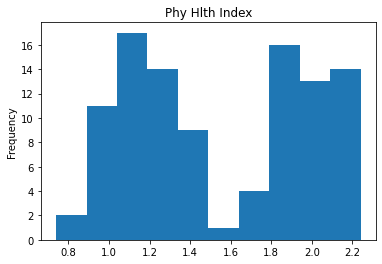

In [35]:
# lets call the histplot function and pass "AA","Phy Hlth Index" as its first arguments for group and column names
histplot("AA","Phy Hlth Index")

> As we can see the histrogram is being skewed by two large values (shows presence of outliers).Therefore, in this situation, we would like to have a better measure of central tendency. We can use either the mean or median value to fill the missing values in Physical Health Index column 

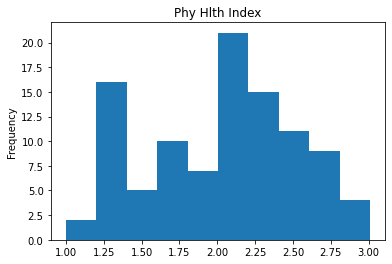

In [36]:
# lets call the histplot function and pass "Cauc","Phy Hlth Index" as its Second arguments for group and column names
histplot("Cauc","Phy Hlth Index")

> As we can see the histrogram is somewhat right skewed (but not completely). We can again use either the mean or median value to fill the missing values in Physical Health Index column 

In [37]:
# calculate the mode for "AA" Physical Health Index
category_group.get_group("AA")["Phy Hlth Index"].mode()[0]

2.12

In [38]:
# calculate the median for "AA" Physical Health Index
category_group.get_group("AA")["Phy Hlth Index"].median()

1.43

In [39]:
# calculate the mean for "AA" Physical Health Index
category_group.get_group("AA")["Phy Hlth Index"].mean()

1.553861386138614

> The mean and median for Physical Health Index in AA group is 1.554,1.43

In [40]:
# calculate the mode for "Cauc" Physical Health Index
category_group.get_group("Cauc")["Phy Hlth Index"].mode()[0]

1.39

In [41]:
# calculate the median for "Cauc" Physical Health Index
category_group.get_group("Cauc")["Phy Hlth Index"].median()

2.115

In [42]:
# calculate the mean for "Cauc" Physical Health Index
category_group.get_group("Cauc")["Phy Hlth Index"].mean()

2.0305

> The mean and median for Physical Health Index in Cauc group is 2.0305,2.115

> We see that the median and mean value is pretty close by for each of these categories. So we can just use the mean values to fill the missing values in Phy Hlth Index 

In [43]:
# fill the null values in Phy Hlth Index using the mean value of each category
df["Phy Hlth Index"]=df.groupby("Race")["Phy Hlth Index"].apply(lambda x: x.fillna(x.mean()))

In [44]:
# check to see if there are any null valuesleft after fillna() operation to our column
df["Phy Hlth Index"].info()

<class 'pandas.core.series.Series'>
Int64Index: 208 entries, 52 to 177
Series name: Phy Hlth Index
Non-Null Count  Dtype  
--------------  -----  
208 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


>Good! There are no more missing values in Phy Hlth Index column

#### Section 4. Evaluation

Question 1:  What are the impacts of the Preventable Factors over Sleep Apnea amongst different races?

In [45]:
#Preventable Factors 
#Lets first pick the columns with values for the Preventable factors for each Race Category
df[["Race","Education","BMI","Obesity","Type of Meals","Exercise Dur(Mins/day)","Lifestyle",
    "Phy Hlth Index","Avg CPAP Use(hrs/night)"]]

,Race,Education,BMI,Obesity,Type of Meals,Exercise Dur(Mins/day),Lifestyle,Phy Hlth Index,Avg CPAP Use(hrs/night)
52,AA,UG,35.4,Y,Fresh,30.0,Active,0.87,4.55
66,AA,HS,30.4,Y,Packed,25.3,Sedentary,1.42,3.42
158,AA,HS,34.8,Y,Packed,21.9,Sedentary,1.23,3.40
137,AA,HS,28.4,N,Packed,21.7,Sedentary,0.99,3.26
117,AA,UG,32.4,Y,Packed,15.2,Sedentary,1.05,3.54
...,...,...,...,...,...,...,...,...,...
85,Cauc,UG,25.4,N,Packed,19.0,Sedentary,1.26,6.03
163,Cauc,UG,26.0,N,Packed,15.6,Sedentary,1.31,5.69
51,Cauc,PG,29.0,N,Fresh,44.0,Active,1.36,5.84
56,Cauc,UG,31.7,Y,Fresh,45.0,Active,2.47,6.08


array([<AxesSubplot:title={'center':'AA'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Cauc'}, ylabel='Frequency'>],
      dtype=object)

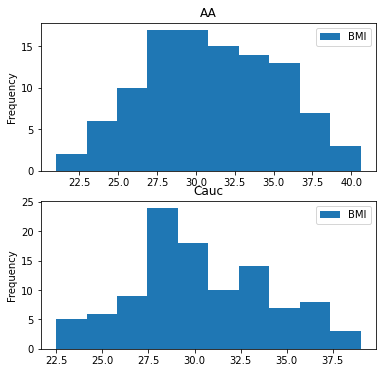

In [46]:
#"Race","Education","BMI","Obesity","Type of Meals","Exercise Dur(Mins/day)","Lifestyle",
# "Phy Hlth Index","Avg CPAP Use(hrs/night)"
#df.hist(column=["BMI"],by="Race", figsize=(8,8))
df.plot.hist(column=["BMI"],by="Race", figsize=(6,6))

> Based on the width of the above histograms, it is suggested that larger number of participants from African-American Race has higher BMIs than their counter parts of Caucasian decent.

array([<AxesSubplot:title={'center':'AA'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Cauc'}, ylabel='Frequency'>],
      dtype=object)

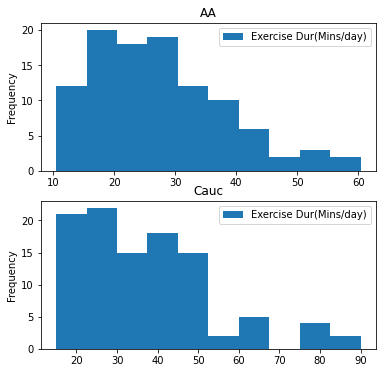

In [47]:
#"Race","Education","BMI","Obesity","Type of Meals","Exercise Dur(Mins/day)","Lifestyle",
# "Phy Hlth Index","Avg CPAP Use(hrs/night)"
df.plot.hist(column=["Exercise Dur(Mins/day)"],by="Race", figsize=(6,6))

> Again based on the above histograms, it could be deduced that more partipants of Caucasian decent spent consistent amount of time exercising/day. Also the partipants from Cauc group had higher mins/day spent exercising than those from AA group.

array([<AxesSubplot:title={'center':'AA'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Cauc'}, ylabel='Frequency'>],
      dtype=object)

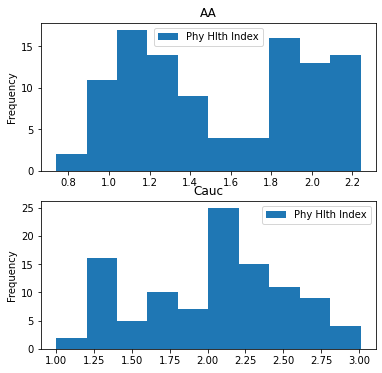

In [48]:
#"Race","Education","BMI","Obesity","Type of Meals","Exercise Dur(Mins/day)","Lifestyle",
# "Phy Hlth Index","Avg CPAP Use(hrs/night)"
df.plot.hist(column=["Phy Hlth Index"],by="Race", figsize=(6,6))

> Based on the above histograms we could see that max PHI for participants from AA group was <=2.5, whereas the max PHI for their Cauc counterparts ranged upto 3 and higher number of them peaked between 2-2.5.

array([<AxesSubplot:title={'center':'AA'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Cauc'}, ylabel='Frequency'>],
      dtype=object)

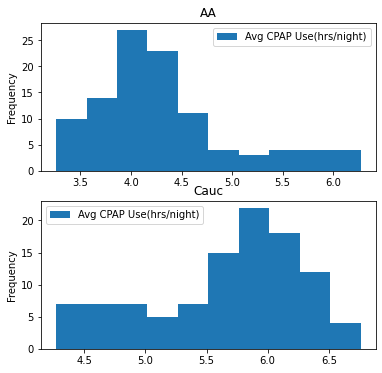

In [49]:
#"Race","Education","BMI","Obesity","Type of Meals","Exercise Dur(Mins/day)","Lifestyle",
# "Phy Hlth Index","Avg CPAP Use(hrs/night)"
df.plot.hist(column=["Avg CPAP Use(hrs/night)"],by="Race", figsize=(6,6))

> Based on the above histograms we could see that participants from AA group CPAP(a therapuetic device to cure Sleep Apnea) for lesser number of hours as compared to the participants from the Cauc group.

<AxesSubplot:xlabel='Race,Education'>

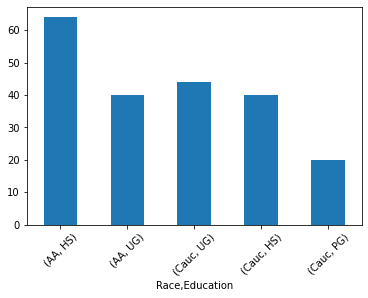

In [50]:
df.groupby(by="Race")["Education"].value_counts().plot.bar(rot=45)

<AxesSubplot:xlabel='Race,Lifestyle'>

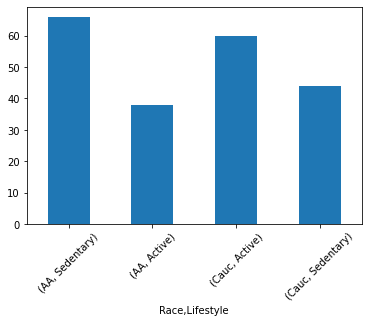

In [51]:
df.groupby(by="Race")["Lifestyle"].value_counts().plot.bar(rot=45)

<AxesSubplot:xlabel='Race,Type of Meals'>

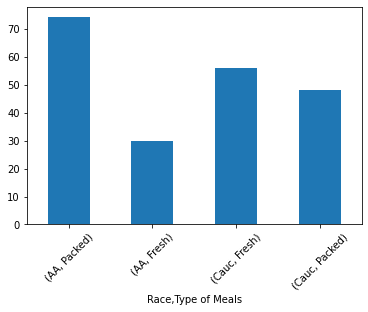

In [52]:
df.groupby(by="Race")["Type of Meals"].value_counts().plot.bar(rot=45)

<AxesSubplot:xlabel='Race,Obesity'>

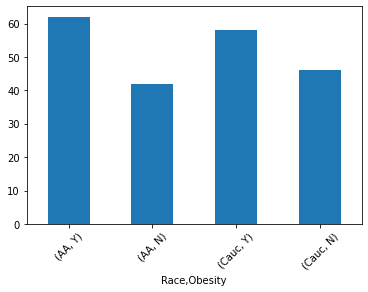

In [53]:
df.groupby(by="Race")["Obesity"].value_counts().plot.bar(rot=45)

> As we can see based on the above data analysis of the remaining columns in this question; the participants in the AA group scored higher points in all the negative sects of the Preventable factors influencing Sleep Apnea.

Question 2:  What are the impacts of the Non-Preventable Factors over Sleep Apnea amongst different races?

In [54]:
#Non-Preventable Factors 
# Again Lets first pick the columns with values for the Non-Preventable factors for each Race Category
df[["Race","Age(Yrs)","Socio-Economic Status","Presence of HTR2A Gene","AHI","Hypertension","Education"]]

,Race,Age(Yrs),Socio-Economic Status,Presence of HTR2A Gene,AHI,Hypertension,Education
52,AA,59,Middle,Y,76.1,Y,UG
66,AA,59,Low,Y,33.7,N,HS
158,AA,59,Low,Y,84.8,Y,HS
137,AA,57,Low,Y,82.7,N,HS
117,AA,56,Middle,Y,37.2,Y,UG
...,...,...,...,...,...,...,...
85,Cauc,22,Middle,N,22.4,N,UG
163,Cauc,22,Middle,N,18.9,N,UG
51,Cauc,21,High,N,19.7,N,PG
56,Cauc,21,High,N,30.6,Y,UG


array([<AxesSubplot:title={'center':'AA'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Cauc'}, ylabel='Frequency'>],
      dtype=object)

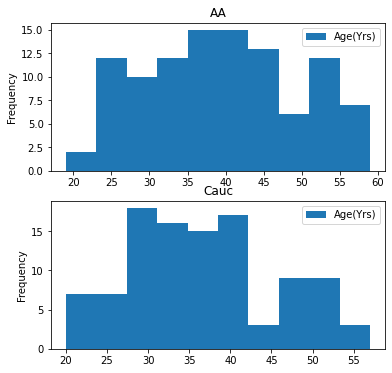

In [55]:
#"Race","Age(Yrs)","Socio-Economic Status","Presence of HTR2A Gene","AHI","Hypertension","Education"
df.plot.hist(column=["Age(Yrs)"],by="Race", figsize=(6,6))

> Based on the width of the above histograms, it is deduced that larger number of participants from African-American Race have Sleep Apnea in the Age group 35-45 and also had a spike in the Age group of around 55. Whereas for the participants from Caucasian group, majority of them have Sleep Apnea between the Age group of 25-42.5.

array([<AxesSubplot:title={'center':'AA'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Cauc'}, ylabel='Frequency'>],
      dtype=object)

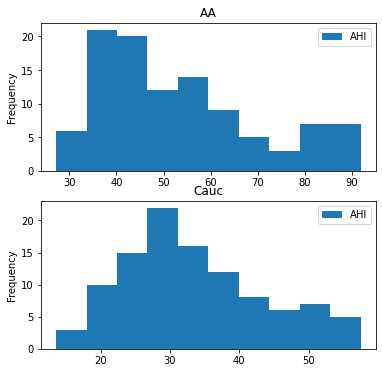

In [56]:
#"Race","Age(Yrs)","Socio-Economic Status","Presence of HTR2A Gene","AHI","Hypertension","Education"
df.plot.hist(column=["AHI"],by="Race", figsize=(6,6))

> Based on the above histogram, it can deduced again that the participants of AA group had higher AHI than the participants in the Cauc group. AHI is basically a measure of the severity of OSA (Obstructive Sleep Apnea). 

<AxesSubplot:xlabel='Race,Education'>

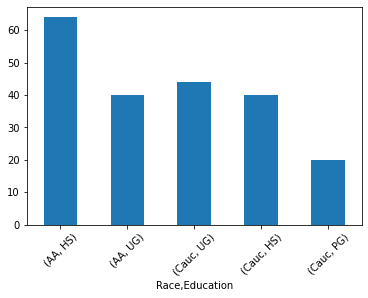

In [57]:
df.groupby(by="Race")["Education"].value_counts().plot.bar(rot=45)

Education in my opinion is something that could be treated both ways as Preventable Factor and/or Non-Preventable Factor. So I decided to put it here as well.

<AxesSubplot:xlabel='Race,Socio-Economic Status'>

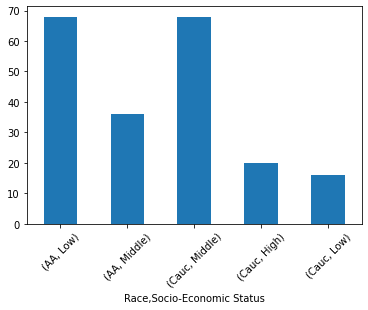

In [58]:
df.groupby(by="Race")["Socio-Economic Status"].value_counts().plot.bar(rot=45)

> The above results show that the participants of AA group were only on the first two levels of the Socio Economic status. Whereas the participants of the Cauc group were on all three levels of the SES group.

<AxesSubplot:xlabel='Race,Presence of HTR2A Gene'>

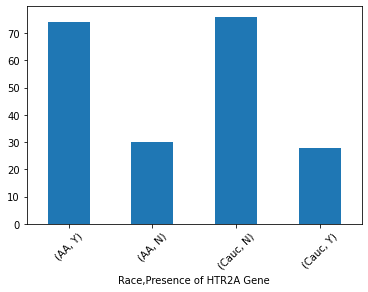

In [59]:
df.groupby(by="Race")["Presence of HTR2A Gene"].value_counts().plot.bar(rot=45)

<AxesSubplot:xlabel='Race,Hypertension'>

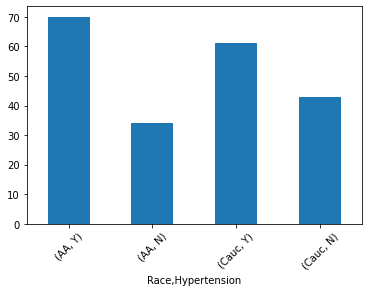

In [60]:
df.groupby(by="Race")["Hypertension"].value_counts().plot.bar(rot=45)

> The above two result sets again show that the participants from the AA group were more likely to have the Presence of HTR2A Gene(OSA Associated - Seratonin receptor enoding Gene) in them and were also the ones with higher numbers of Hypertensive cases.

Question 3:  Can it be cured or even controlled over time by proper therapy(CPAP Use)?

> To answer this question we need to analyze the dataset for the Quality of Sleep, participants from both the Race had, again what was their Avg use of CPAP device, and how well they were able to reduce the most common symptoms of Sleep Apnea.

array([<AxesSubplot:title={'center':'AA'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Cauc'}, ylabel='Frequency'>],
      dtype=object)

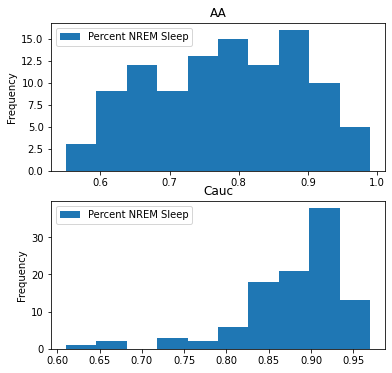

In [61]:
#"Race", "Percent NREM Sleep"
df.plot.hist(column=["Percent NREM Sleep"],by="Race", figsize=(6,6))

array([<AxesSubplot:title={'center':'AA'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Cauc'}, ylabel='Frequency'>],
      dtype=object)

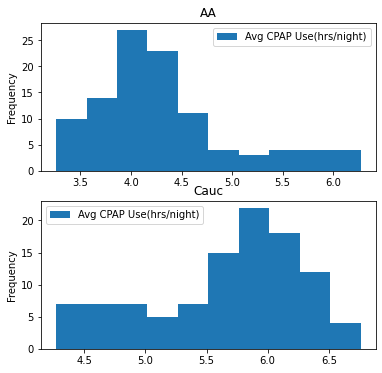

In [62]:
#"Race", "Avg CPAP Use(hrs/night)"
df.plot.hist(column=["Avg CPAP Use(hrs/night)"],by="Race", figsize=(6,6))

> The Above two sets of Histograms show that among the two Race groups participants, Caucasians had better quality sleep than the participants of AA group. Which upon comparing their number of hours/night use of CPAP device, show that Cauc group participants had higher values than the AA group. This could help us clearly predict the fact that OSA could be cured/controlled by longer use of CPAP device.

<AxesSubplot:xlabel='Race,Reduced Snoring-Post 12wks CPAP Use'>

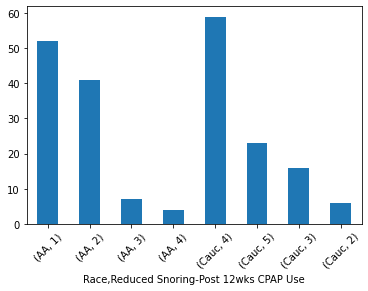

In [63]:
df.groupby(by="Race")["Reduced Snoring-Post 12wks CPAP Use"].value_counts().plot.bar(rot=45)

<AxesSubplot:xlabel='Race,Reduced Tiredness-Post 12wks CPAP Use'>

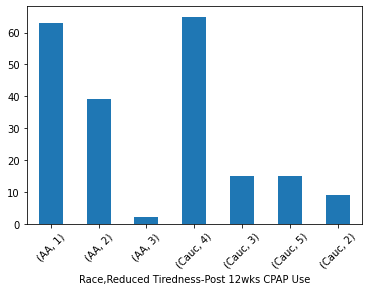

In [64]:
df.groupby(by="Race")["Reduced Tiredness-Post 12wks CPAP Use"].value_counts().plot.bar(rot=45)

<AxesSubplot:xlabel='Race,Reduced Daytime Sleepiness-Post 12wks CPAP Use'>

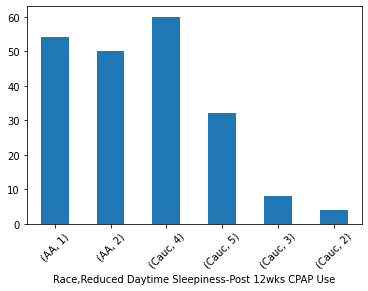

In [65]:
df.groupby(by="Race")["Reduced Daytime Sleepiness-Post 12wks CPAP Use"].value_counts().plot.bar(rot=45)

> Finally the Above sets of Histograms show that among the two Race groups participants, Caucasians had better responses than the participants of AA group, for all the syptoms of Sleep Apnea. Which again can be directly related to the number of hours/night use of CPAP device among the two groups. The histograms clearly show that Cauc group participants had higher values than the AA group, since their reponses on the Likert Scale were always higher for feeling better Post 12 weeks CPAP use review. This could help us clearly answer the question, that OSA could be cured or at the least controlled by longer use of CPAP device.

array([<AxesSubplot:title={'center':'AA'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Cauc'}, ylabel='Frequency'>],
      dtype=object)

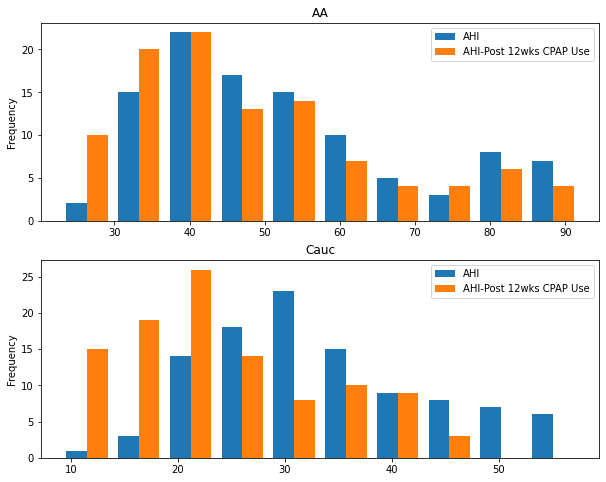

In [66]:
#df.plot.hist(column=["AHI","AHI-Post 12wks CPAP Use"], figsize=(10,8))
df.plot.hist(column=["AHI","AHI-Post 12wks CPAP Use"],by="Race", figsize=(10,8))

> As a final visualization for the entire data set comparisons for the Pre and Post 12 weeks AHI values, we can see that for sure there is some reduction in the AHi values post proper and regular use of CPAP devices.